# Pyplot Tutorial

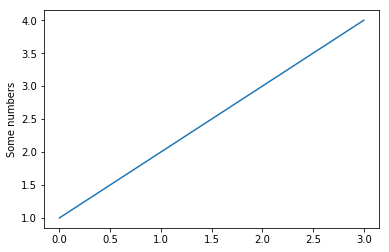

In [4]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([1,2,3,4])
plt.ylabel("Some numbers")
plt.show()

If you provide a single list or array to the plot() command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0,1,2,3]

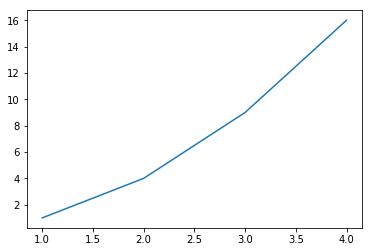

In [5]:
plt.plot([1,2,3,4],[1,4,9,16]) #order is x,y

For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. 

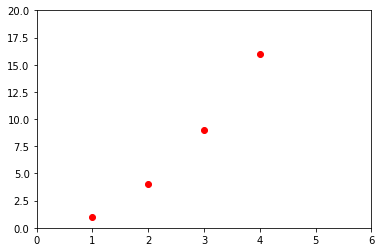

In [6]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4],[1,4,9,16],'ro')
plt.axis([0,6,0,20]) #This specifies the xy axis range
plt.show()

If matplotlib were limited to working with lists, it would be fairly useless for numeric processing. Generally, you will use numpy arrays. In fact, all sequences are converted to numpy arrays internally. The example below illustrates a plotting several lines with different format styles in one command using arrays.

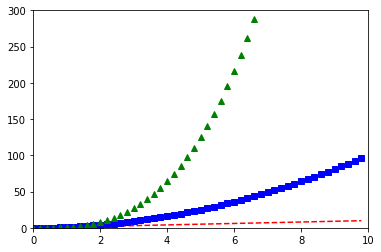

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#evenly sampled time at 200 ms intervals
t=np.arange(0.,10.,0.2)
plt.plot(t,t,'r--',t,t**2,'bs',t,t**3,'g^')
plt.axis([0,10,0,300])
plt.show()

# Controlling line properties

Different types of line styles:
1. Linewidth
2. Dash style
3. Antialiased 
LIne styles can be accessed multiple different ways 

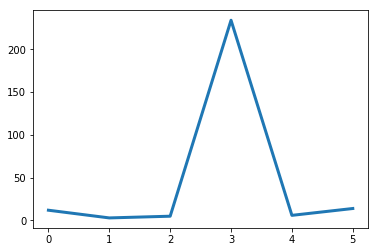

In [8]:
#Accessed through key word arguments
x=[0,1,2,3,4,5]
y=[12,3,5,234,6,14]
plt.plot(x,y,linewidth=3.0)
plt.show()

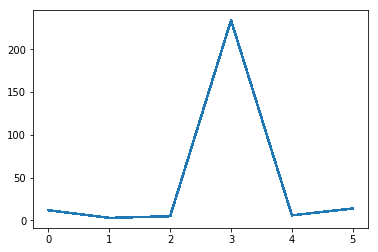

In [9]:
#Accessed through setter methods 
line,=plt.plot(x,y,'-')
line.set_antialiased(False)

# Working with multiple figures and axes

MATLAB, and pyplot, have the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function gca() returns the current axes (a matplotlib.axes.Axes instance), and gcf() returns the current figure (matplotlib.figure.Figure instance). 

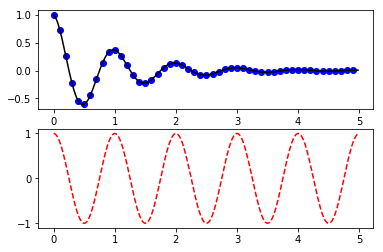

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t)*np.cos(2*np.pi*t)

t1=np.arange(0,5,0.1)
t2=np.arange(0.,5.,.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1,f(t1),'bo',t2,f(t2),'k')

plt.subplot(212)
plt.plot(t2,np.cos(2*np.pi*t2),'r--')
plt.show()


The figure() command here is optional because figure(1) will be created by default, just as a subplot(111) will be created by default if you don’t manually specify any axes. The subplot() command specifies numrows, numcols, fignum where fignum ranges from 1 to numrows*numcols. The commas in the subplot command are optional if numrows*numcols<10. So subplot(211) is identical to subplot(2, 1, 1).

/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Easy as 1,2,3')

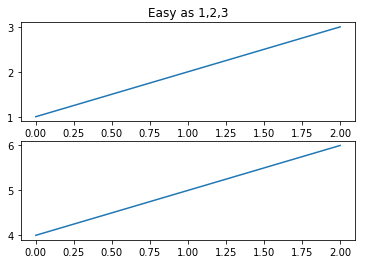

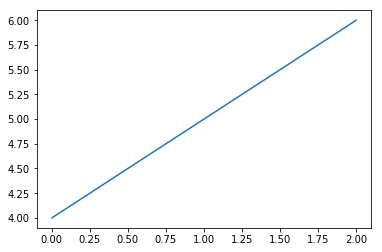

In [11]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(211) #The first subplot of the first figure
plt.plot([1,2,3])
plt.subplot(212) #The second subplot of the second figure
plt.plot([4,5,6])

plt.figure(2)
plt.plot([4,5,6])

plt.figure(1)
plt.subplot(211)
plt.title("Easy as 1,2,3")

If you are making lots of figures, you need to be aware of one more thing: the memory required for a figure is not completely released until the figure is explicitly closed with close(). Deleting all references to the figure, and/or using the window manager to kill the window in which the figure appears on the screen, is not enough, because pyplot maintains internal references until close() is called.

# Working with text
xlabel(), ylabe() are used to add text in the indicated locations

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

In [13]:
mu, sigma=100, 15

In [14]:
x=mu+sigma*np.random.randn(10000)
x

array([ 115.73956466,  112.99148762,  108.267019  , ...,   95.52403791,
         73.28843349,   77.0735325 ])

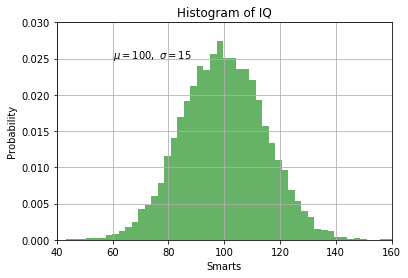

In [23]:
# The histogram of the data
n,bins,patches=plt.hist(x,50,normed=1,facecolor='green',alpha=0.6)
plt.xlabel('Smarts')
plt.ylabel("Probability")
plt.title("Histogram of IQ")
plt.text(60,.025,r'$\mu=100,\ \sigma=15$')
plt.axis([40,160,0,0.03])
plt.grid(True)
plt.show()

All of the text() commands return an matplotlib.text.Text instance. Just as with with lines above, you can customize the properties by passing keyword arguments into the text functions or using setp():


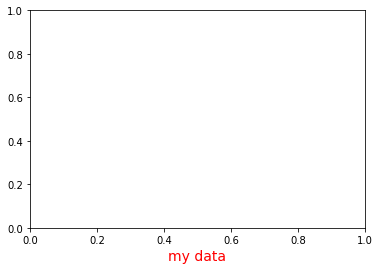

In [16]:
t=plt.xlabel('my data',fontsize=14,color="red")

Text(0.5,1,'$\\sigma_i=15$')

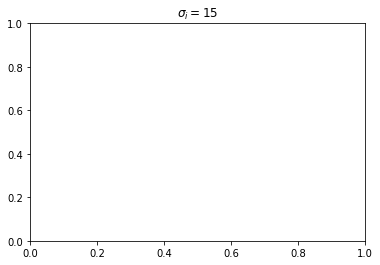

In [24]:
plt.title(r'$\sigma_i=15$')

The r preceding the title string is important – it signifies that the string is a raw string and not to treat backslashes as python escapes. matplotlib has a built-in TeX expression parser and layout engine, and ships its own math fonts – for details see Writing mathematical expressions. Thus you can use mathematical text across platforms without requiring a TeX installation. For those who have LaTeX and dvipng installed, you can also use LaTeX to format your text and incorporate the output directly into your display figures or saved postscript – see Text rendering With LaTeX.

# Annotating Text
The uses of the basic text() command above place text at an arbitrary position on the Axes. A common use for text is to annotate some feature of the plot, and the annotate() method provides helper functionality to make annotations easy. In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. Both of these arguments are (x,y) tuples

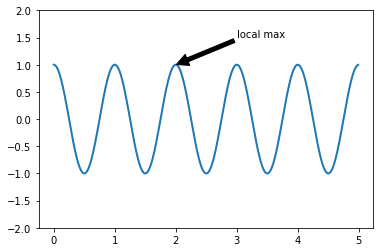

In [32]:
import numpy as np
import matplotlib.pyplot as plt

ax=plt.subplot(111)
t=np.arange(0.0,5.0,0.01)
s=np.cos(2*np.pi* t)
line, =plt.plot(t,s,lw=2)

plt.annotate("local max",xy=(2,1),xytext=(3,1.5),
             arrowprops=dict(facecolor='black', shrink=0.01))

plt.ylim(-2,2)
plt.show()

# Logarithmic and other nolinear axes
Different types of scales can be supported through plt.xscale('log;)

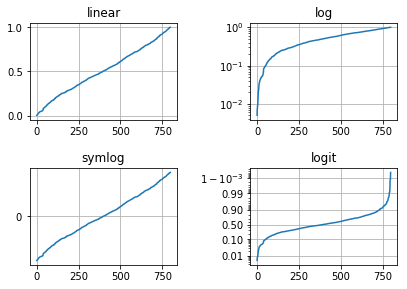

In [44]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter #use for logit scale
#Fixing random state for reproducibility 
np.random.seed(19680801)

#make up some data in the interval [0,1]
y=np.random.normal(loc=0.5,scale=0.4,size=1000)
y=y[(y>0)&(y<1)]
y.sort()
x=np.arange(len(y))

plt.figure(1)
#linear
plt.subplot(221)
plt.plot(x,y)
plt.yscale("linear")
plt.title('linear')
plt.grid(True)

#log
plt.subplot(222)
plt.plot(x,y)
plt.yscale("log")
plt.title("log")
plt.grid(True)

#symmetric log
plt.subplot(223)
plt.plot(x,y-y.mean())
plt.yscale("symlog",lintthreshy=0.01)
plt.title("symlog")
plt.grid(True)

#logi
plt.subplot(224)
plt.plot(x,y)
plt.yscale("logit")
plt.title("logit")
plt.grid("True")

# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92,bottom=0.08,left=0.1,right=0.95,hspace=0.5,wspace=0.5)
plt.show()